<a href="https://colab.research.google.com/github/boslyn/sc1015_A133_Team9/blob/main/SC1015_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SC1015 PROJECT**

> Tan Yue Hui, Pang Boslyn, Shen Jia Cheng



# Detection of Fake News


> Given the increasing trend of fake news appearing in the virtual world, we would need to be more aware of it and recognise the different types of news there are. We would also have an obligation to reduce the sharing of such info to prevent proliferation.

> Fake news brings about a range of banes, most of which is to alter our perceptions and beliefs on certain groups. In more serious cases, fake news serve as entry points for hackers to access our information. Clearly, the proliferation of fake news is undesirable for the progression of society.

> Hence, our group aims to apply automated classification techniques using Machine Learning (ML) to aid in determining if the news is fake or real. This has consistently shown higher accuracy than manual classification. 

> We propose a system that performs detection and classification by using Machine Learning techniques and different classification models to ultimately aid in the detection of fake news based on our dataset.









# Problem Statement

> How might we determine if news on online platform is real or fake?

# Data Preparation and Cleaning

Importing the basic libraries

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import statistics as st
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

import gc

# visualisation

# tensorflow/keras
from tensorflow import keras as kr
from tqdm.keras import TqdmCallback

# sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FakeNewsNet.csv to FakeNewsNet (3).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['FakeNewsNet.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          23196 non-null  object
 1   news_url       22866 non-null  object
 2   source_domain  22866 non-null  object
 3   tweet_num      23196 non-null  int64 
 4   real           23196 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 906.2+ KB


In [ ]:
df.isnull().sum()

title              0
news_url         330
source_domain    330
tweet_num          0
real               0
dtype: int64

In [ ]:
null_data = df[df['news_url'].isna()]
null_data.head()

,title,news_url,source_domain,tweet_num,real
14,2011 via CQ subscribers only Tax Foundation,NaN,NaN,0,1
72,Patient Protection and Affordable Care Act,NaN,NaN,2437,1
87,Jennifer Lopez Snubbed Vanessa Hudgens On ‘ Se...,NaN,NaN,4,0
177,Gwen Stefani Call Off Blake Shelton,NaN,NaN,85,0
198,Angelina Jolie Attending Royal Wedding Specul...,NaN,NaN,3,0


In [ ]:
df.dropna(inplace=True)

Have to run the '#creating a new column for number of words in title' before running the df.isnull().sum

In [ ]:
df.isnull().sum()

title              0
news_url         330
source_domain    330
tweet_num          0
real               0
dtype: int64

In [ ]:
df['real'].value_counts()

1    17441
0     5755
Name: real, dtype: int64

In [ ]:
# Converting int64 variable (real) to boolean (True/False)
df['real'] = df['real'].astype('bool')
print(df.dtypes)

title            object
news_url         object
source_domain    object
tweet_num         int64
real               bool
dtype: object


In [ ]:
df.shape

(23196, 5)

In [ ]:
#Creating new column for number of words in title
def word_count(title):
    count = 1
    for x in title:
        if x == " ":
            count += 1
    return count

df["title count"] = word_count(df['title'])
for y in range(0,23196):
    df["title count"][y] = word_count(df['title'][y])
df

<ipython-input-76-7026d106458f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["title count"][y] = word_count(df['title'][y])


,title,news_url,source_domain,tweet_num,real,title count
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,True,13
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,True,9
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,True,15
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,True,10
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,True,17
...,...,...,...,...,...,...
23191,Pippa Middleton wedding: In case you missed it...,https://www.express.co.uk/news/royal/807049/pi...,www.express.co.uk,52,True,15
23192,Zayn Malik & Gigi Hadid’s Shocking Split: Why ...,hollywoodlife.com/2018/03/13/zayn-malik-gigi-h...,hollywoodlife.com,7,False,16
23193,Jessica Chastain Recalls the Moment Her Mother...,http://www.justjared.com/2018/01/17/jessica-ch...,www.justjared.com,26,True,17
23194,"Tristan Thompson Feels ""Dumped"" After Khloé Ka...",www.intouchweekly.com/posts/tristan-thompson-f...,www.intouchweekly.com,24,False,16


In [ ]:
import nltk
import nltk.tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#Cleaning of title by removing stop words and lemmatizing of words
def clean_data(text):
    text = text.lower() 
    text = re.sub('[^a-zA-Z]' , ' ' , text)
    token = text.split() 
    token = [lemmatizer.lemmatize(word) for word in token if not word in stop_words]  
    clean_news = ' '.join(token) 
    
    return clean_news 
df['title'] = df['title'].apply(lambda x : clean_data(x))
df

,title,news_url,source_domain,tweet_num,real,title count
0,kandi burruss explodes rape accusation real ho...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,True,13
1,people choice award best red carpet look,https://www.today.com/style/see-people-s-choic...,www.today.com,0,True,9
2,sophia bush sends sweet birthday message one t...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,True,15
3,colombian singer maluma spark rumour inappropr...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,True,10
4,gossip girl year later upper east siders shock...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,True,17
...,...,...,...,...,...,...
23191,pippa middleton wedding case missed pippa marr...,https://www.express.co.uk/news/royal/807049/pi...,www.express.co.uk,52,True,15
23192,zayn malik gigi hadid shocking split chance re...,hollywoodlife.com/2018/03/13/zayn-malik-gigi-h...,hollywoodlife.com,7,False,16
23193,jessica chastain recall moment mother boyfrien...,http://www.justjared.com/2018/01/17/jessica-ch...,www.justjared.com,26,True,17
23194,tristan thompson feel dumped khlo kardashian r...,www.intouchweekly.com/posts/tristan-thompson-f...,www.intouchweekly.com,24,False,16


# Data Exploration

True     17371
False     5495
Name: real, dtype: int64


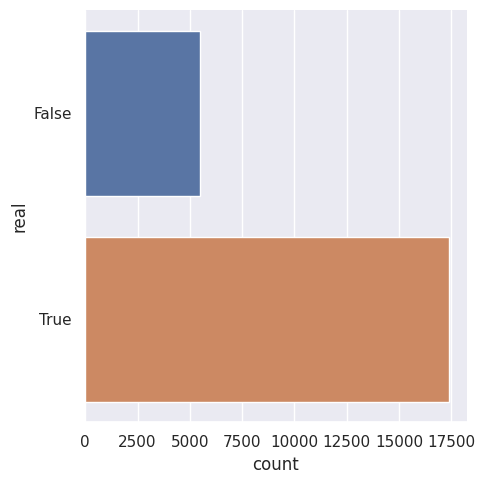

In [ ]:
# plotting the cat plot of True vs False (univariate)
print(df["real"].value_counts())
sb.catplot(data=df, y='real',kind='count')

In [ ]:
print('Number of sources: ', len(df['source_domain'].unique()))
print(df['source_domain'].value_counts())

Number of sources:  2441
people.com                1786
www.dailymail.co.uk        964
en.wikipedia.org           741
www.usmagazine.com         709
www.etonline.com           666
                          ... 
bioguide.congress.gov        1
dailyheadlines.net           1
www.duggarfamily.com         1
www.naturallycurly.com       1
flashnewscorner.com          1
Name: source_domain, Length: 2441, dtype: int64


In [ ]:
# describe data for number of retweets
df['tweet_num'].describe()

count    22866.000000
mean        88.398802
std        488.712092
min          0.000000
25%         11.000000
50%         38.000000
75%         65.000000
max      29060.000000
Name: tweet_num, dtype: float64

In [ ]:
df['tweet_num']

0        42
1         0
2        63
3        20
4        38
         ..
23191    52
23192     7
23193    26
23194    24
23195    85
Name: tweet_num, Length: 22866, dtype: int64

<Axes: xlabel='tweet_num', ylabel='Density'>

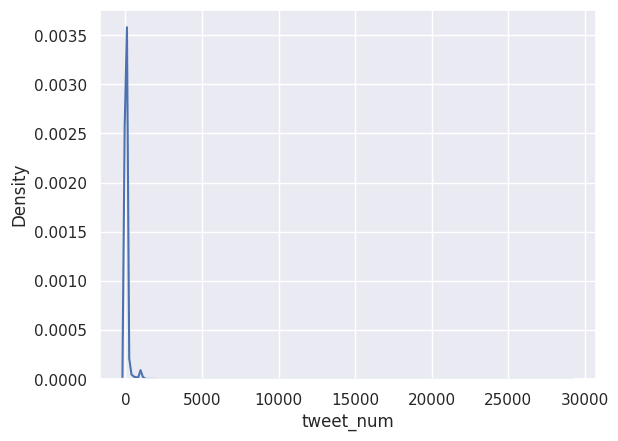

In [ ]:
#Plot distribution for number of retweets
sb.kdeplot(df['tweet_num'])

<Axes: >

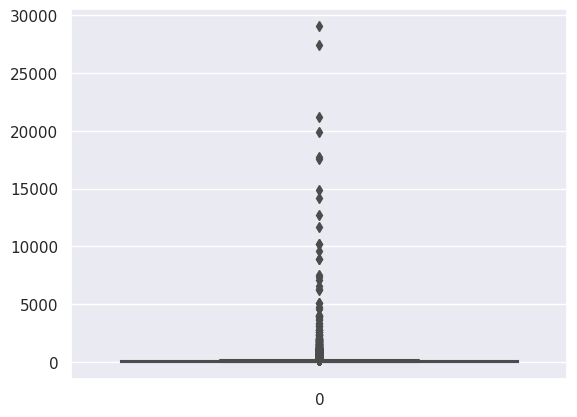

In [ ]:
# Plot boxplot for number of retweets
sb.boxplot(df['tweet_num'])

In [ ]:
# Statistical summary of number of words in title
df['title count'].describe()

count    22866.000000
mean        11.190064
std          3.974740
min          1.000000
25%          9.000000
50%         11.000000
75%         14.000000
max         53.000000
Name: title count, dtype: float64

In [ ]:
df['title count']

0        13
1         9
2        15
3        10
4        17
         ..
23191    15
23192    16
23193    17
23194    16
23195    17
Name: title count, Length: 22866, dtype: int64

<Axes: xlabel='title count', ylabel='Density'>

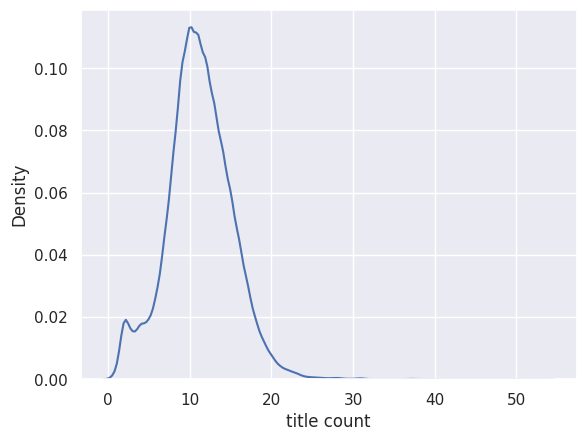

In [ ]:
sb.kdeplot(df['title count'])

<Axes: xlabel='title count', ylabel='Count'>

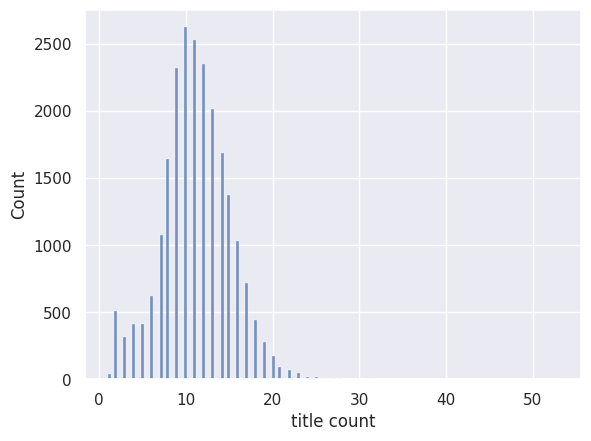

In [ ]:
#Histogram plot for title count
sb.histplot(df['title count'])

<Axes: >

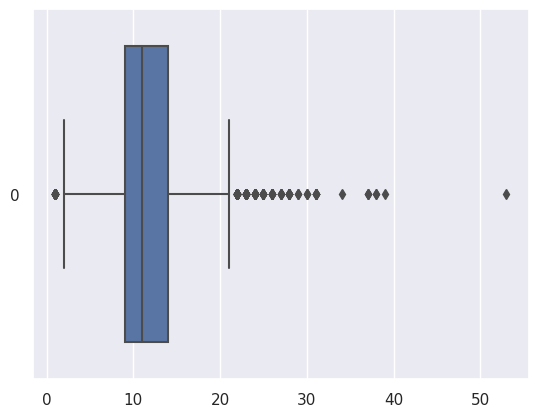

In [ ]:
sb.boxplot(df['title count'],orient='h')

<Axes: >

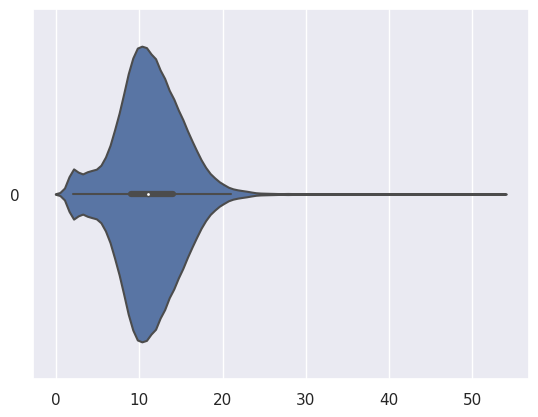

In [ ]:
sb.violinplot(df['title count'], orient='h')

In [ ]:
#extracting variables real and title count
true_false=pd.DataFrame(df['real'])
titlecount=pd.DataFrame(df['title count'])

<Axes: xlabel='real', ylabel='title count'>

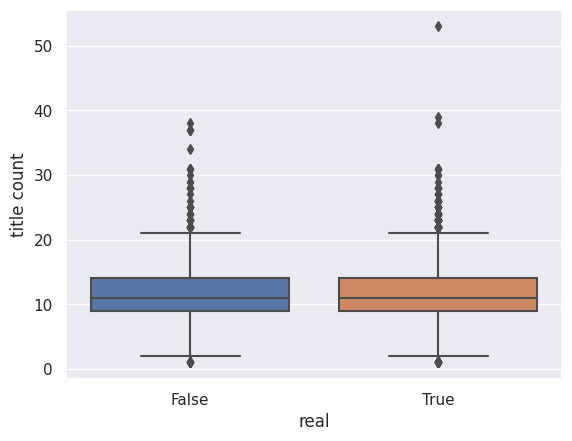

In [ ]:
sb.boxplot(x='real', y='title count', data=df)

The 'title count' is not really a good indicator of whether news is real or fake as the distribution of the boxplot as seen above is similar for both real and fake news. Therefore, title count cannot be used to predict if the news article is real or fake.

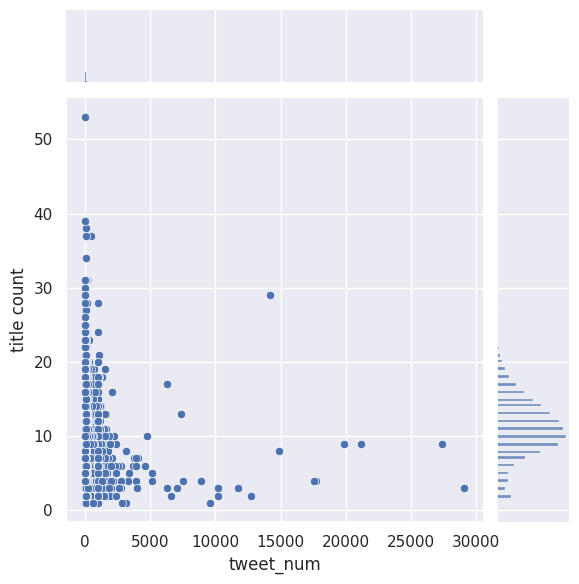

In [ ]:
# joint plot to analyse if there is a correlation between title count and tweet_num
sb.jointplot(x='tweet_num', y='title count', data=df)

<Axes: xlabel='tweet_num', ylabel='real'>

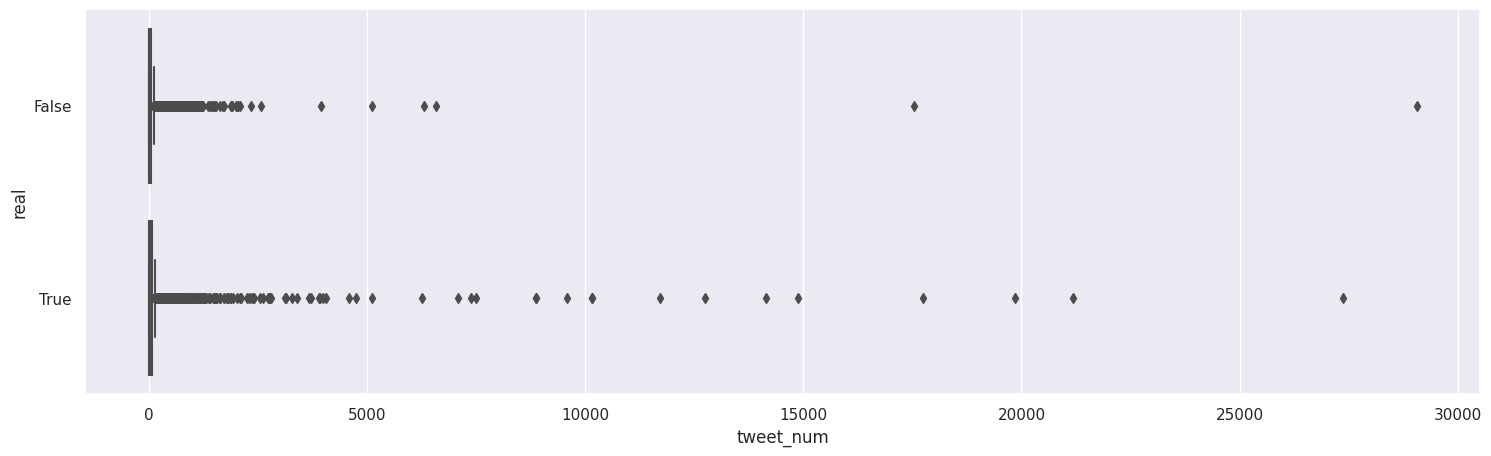

In [ ]:
retweets= pd.DataFrame(df['tweet_num'])
real_fake = pd.DataFrame(df['real'])
# Create a joint dataframe by concatenating retweets and real_fake
retweet_realfake = pd.concat([retweets, real_fake], axis = 1).reindex(retweets.index)

f = plt.figure(figsize=(18, 5))
sb.boxplot(x = "tweet_num", y = "real", data = retweet_realfake, orient = "h")

The number of retweets is not a good predictor of whether the news article is fake or real as the distribution of the boxplots of Fake (0) and Real (1) are similar. The boxplot of Real and Fake cannot be partitioned.

# Machine Learning

In [ ]:
x_df = df['title']
y_df = df['real']

count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(x_df)
freq_term_matrix = count_vectorizer.transform(x_df)
tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [ ]:
x_df = df['title']
y_df = df['real']
x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix, y_df, test_size =0.2)

In [ ]:
records_df = pd.DataFrame(columns = ['Model', 'Accuracy', ' True Pos', 'False Pos', 'True Neg', 'False Neg'])
def update_accuracy(cm, acc, model):
    df = [1,2,3,4,5,6]
    FP = float(cm[0][1])
    TP = float(cm[1][1])
    FN = float(cm[1][0])
    TN = float(cm[0][0])
    TPR = (TP/(TP+FP))*100
    FPR = 100 - TPR
    TNR = (TN/(TN+FN))*100
    FNR = 100 - TNR
    df[0] = model
    df[1] = round(float(acc*100),1)
    df[2] = round(float(TPR),1)
    df[3] = round(float(FPR),1)
    df[4] = round(float(TNR),1)
    df[5] = round(float(FNR),1)
    return df

### **Model 1 : Logistic Regression Model**

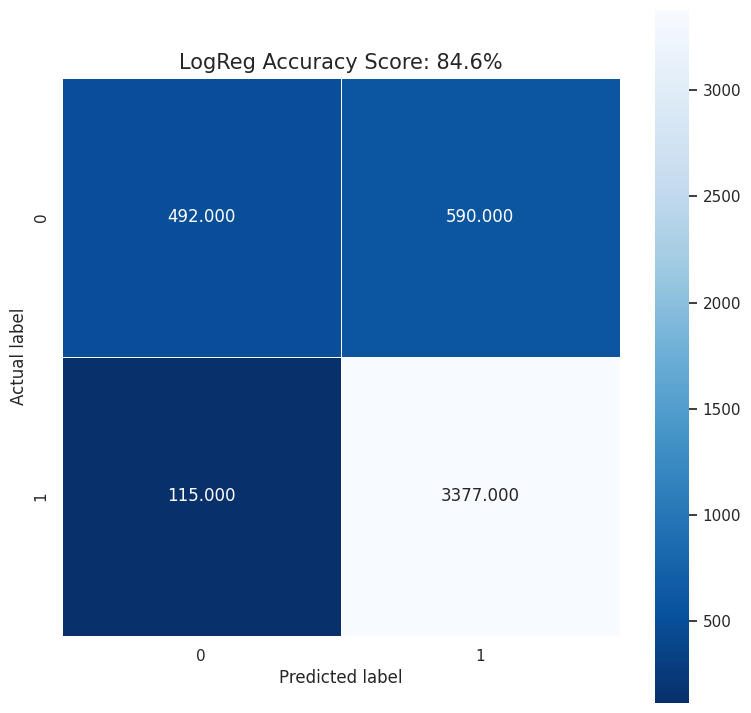

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

logreg_prediction = logreg.predict(x_test)
logreg_acc = accuracy_score(y_test,logreg_prediction)
logreg_cm = metrics.confusion_matrix(y_test, logreg_prediction)

plt.figure(figsize=(9,9))
sb.heatmap(logreg_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'LogReg Accuracy Score: {0:.1f}%'.format(logreg_acc*100)
plt.title(all_sample_title, size = 15)

accuracy_list = update_accuracy(logreg_cm, logreg_acc, "Log Reg")
records_df.loc[len(records_df)] = accuracy_list

### **Model 2 : Naive-Bayes Prediction Model**

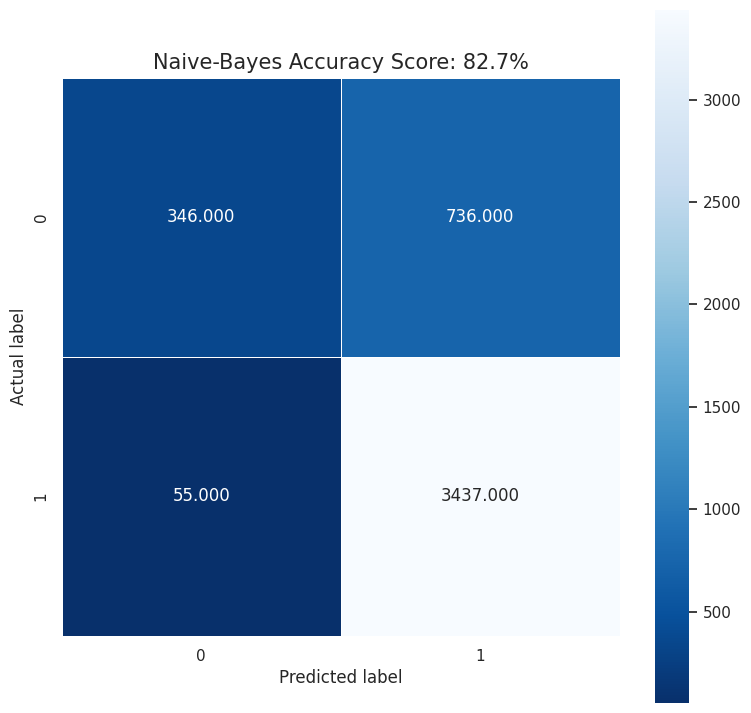

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(x_train, y_train)

naive_pred = NB.predict(x_test)
naive_acc = accuracy_score(y_test,naive_pred)
naive_cm = metrics.confusion_matrix(y_test, naive_pred)

plt.figure(figsize=(9,9))
sb.heatmap(naive_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Naive-Bayes Accuracy Score: {0:.1f}%'.format(naive_acc*100)
plt.title(all_sample_title, size = 15)

accuracy_list = update_accuracy(naive_cm, naive_acc, "Naive-Bayes")
records_df.loc[len(records_df)] = accuracy_list

### **Model 3 : Decision Tree Classifier Model**

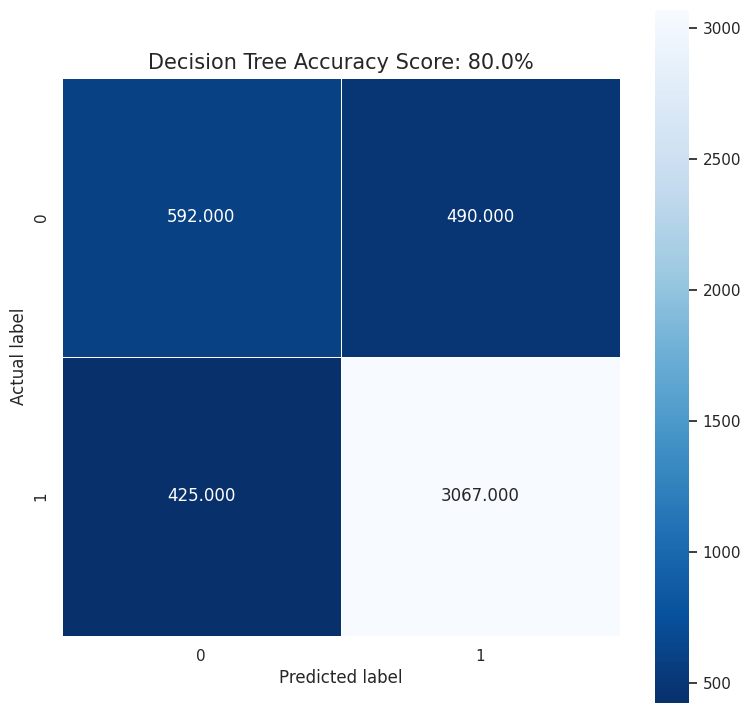

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

tree_pred = clf.predict(x_test)
tree_acc = accuracy_score(y_test,tree_pred)
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

plt.figure(figsize=(9,9))
sb.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Decision Tree Accuracy Score: {0:.1f}%'.format(tree_acc*100)
plt.title(all_sample_title, size = 15)

accuracy_list = update_accuracy(tree_cm, tree_acc, "Decision Tree")
records_df.loc[len(records_df)] = accuracy_list

### **Model 4 : Passive-Aggressive Classifier Model**

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


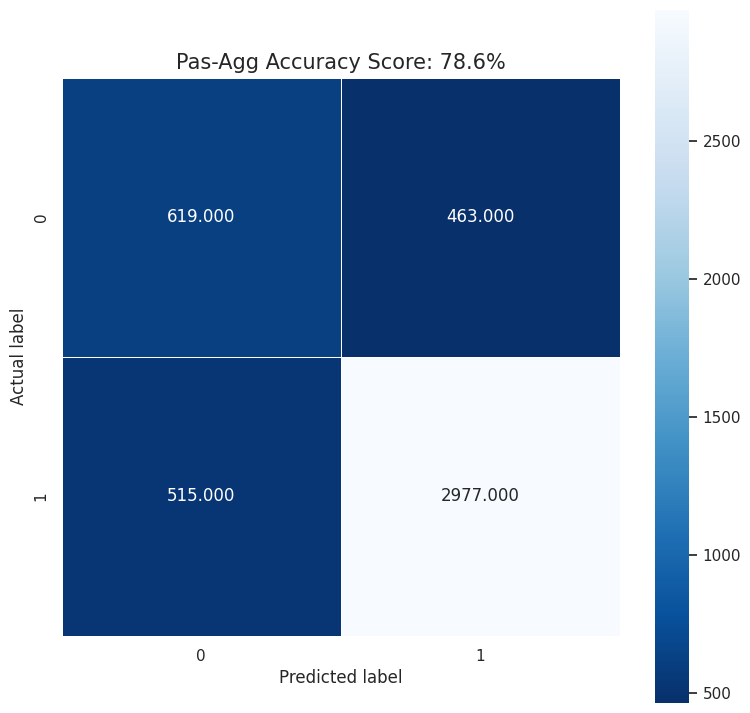

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
pag = PassiveAggressiveClassifier(max_iter=50)
pag.fit(x_train,y_train)

passive_agg_pred = pag.predict(x_test)
passive_agg_acc = accuracy_score(y_test,passive_agg_pred)
passive_agg_cm = metrics.confusion_matrix(y_test, passive_agg_pred)

plt.figure(figsize=(9,9))
sb.heatmap(pag_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Pas-Agg Accuracy Score: {0:.1f}%'.format(float(passive_agg_acc*100))
plt.title(all_sample_title, size = 15)

accuracy_list = update_accuracy(pag_cm, passive_agg_acc, "Pas-Agg")
records_df.loc[len(records_df)] = accuracy_list

### **Model 5 : Support Vector Machine Classifier Model**

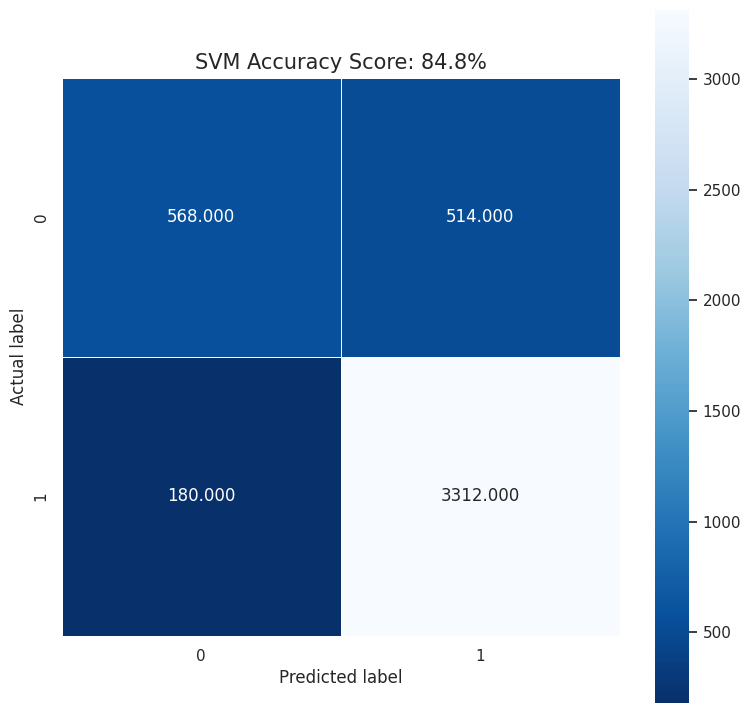

In [ ]:
from sklearn import svm
svmclf = svm.SVC(kernel='linear')
svmclf.fit(x_train,y_train)

svm_pred = svmclf.predict(x_test)
svm_acc = accuracy_score(y_test,svm_pred)
svm_cm = metrics.confusion_matrix(y_test, svm_pred)

plt.figure(figsize=(9,9))
sb.heatmap(svm_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'SVM Accuracy Score: {0:.1f}%'.format(float(svm_acc*100))
plt.title(all_sample_title, size = 15)

accuracy_list = update_accuracy(svm_cm, svm_acc, "SVM")
records_df.loc[len(records_df)] = accuracy_list

### **Model 6 : Ensemble**

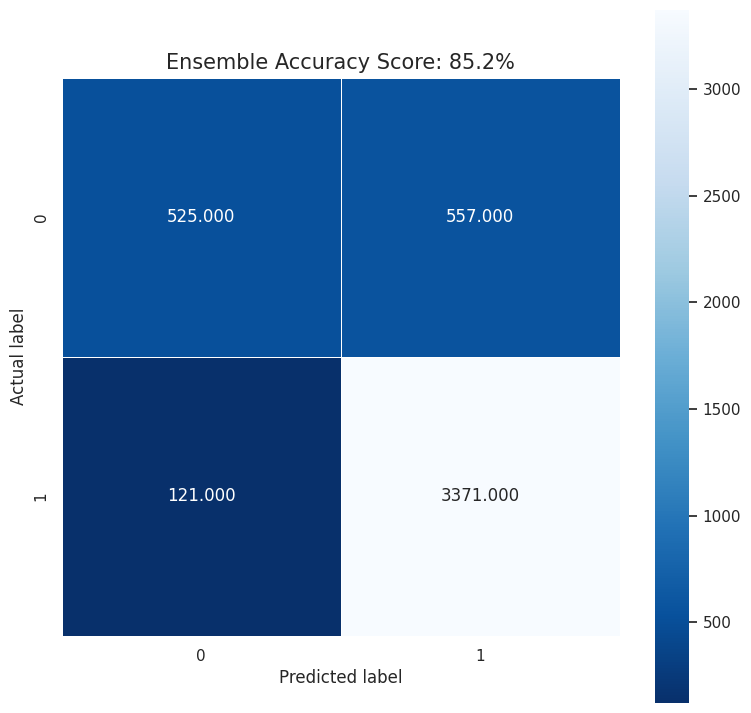

In [ ]:
ensemble_pred = [None] * len(passive_agg_pred)

for i in range(0,len(passive_agg_pred)):
    total = 0
    if logreg_prediction[i]:
        total = total + 1
    if naive_pred[i]:
        total = total + 1
    if tree_pred[i]:
        total += 1
    if passive_agg_pred[i]:
        total+=1
    if svm_pred[i]:
        total += 1
    
    if total >= 3:
        ensemble_pred[i] = 1
    else:
        ensemble_pred[i] = 0

ensemble_pred = np.array(ensemble_pred)
ensemble_acc = accuracy_score(y_test,ensemble_pred)
ensemble_cm = metrics.confusion_matrix(y_test, ensemble_pred)

plt.figure(figsize=(9,9))
sb.heatmap(ensemble_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Ensemble Accuracy Score: {0:.1f}%'.format(float(ensemble_acc*100))
plt.title(all_sample_title, size = 15)

accuracy_list = update_accuracy(ensemble_cm, ensemble_acc, "Ensemble")
records_df.loc[len(records_df)] = accuracy_list

In [ ]:
records_df

,Model,Accuracy,True Pos,False Pos,True Neg,False Neg
0,Log Reg,84.6,85.1,14.9,81.1,18.9
1,Naive-Bayes,82.7,82.4,17.6,86.3,13.7
2,Decision Tree,80.0,86.2,13.8,58.2,41.8
3,Pas-Agg,78.6,86.5,13.5,54.6,45.4
4,SVM,84.8,86.6,13.4,75.9,24.1
5,Ensemble,85.2,85.8,14.2,81.3,18.7
